In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
salary = pd.read_csv('san-francisco-2018.csv')

In [4]:
salary.head()

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Pension Debt,Total Pay & Benefits,Year,Notes,Agency,Status
0,Paulo Morgado,Police Officer 3,592394.34,0.0,0.0,120408.02,592394.34,NaN,712802.36,2018,NaN,San Francisco,PT
1,William J Coaker Jr.,Chief Investment Officer,560793.00,0.0,0.0,119876.54,560793.00,NaN,680669.54,2018,NaN,San Francisco,FT
2,David E Francl,Managing Director,468997.01,0.0,0.0,94470.27,468997.01,NaN,563467.28,2018,NaN,San Francisco,FT
3,Arthur L Wang,Managing Director,415876.10,0.0,48784.5,82143.88,464660.60,NaN,546804.48,2018,NaN,San Francisco,FT
4,Cherisse Elaine Boland,Criminalist III,417600.54,0.0,0.0,91755.22,417600.54,NaN,509355.76,2018,NaN,San Francisco,FT


In [5]:
salary.describe()

,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Pension Debt,Total Pay & Benefits,Year,Notes
count,42309.000000,42309.000000,42309.000000,42309.00000,42309.000000,0.0,42309.000000,42309.0,0.0
mean,76947.426822,6746.790232,3487.691270,26292.45519,87181.908324,NaN,113474.363514,2018.0,NaN
std,49302.124916,15098.483703,7300.346906,15730.84578,57556.541795,NaN,71905.967299,0.0,NaN
min,0.000000,0.000000,-246.640000,-745.72000,0.000000,NaN,0.000000,2018.0,NaN
25%,41947.300000,0.000000,0.000000,14086.06000,45735.800000,NaN,60688.020000,2018.0,NaN
50%,75328.850000,1.430000,701.160000,29694.13000,83748.010000,NaN,113274.070000,2018.0,NaN
75%,108868.400000,6338.300000,3960.390000,36776.00000,122882.300000,NaN,158872.310000,2018.0,NaN
max,592394.340000,309481.030000,184400.350000,120408.02000,592394.340000,NaN,712802.360000,2018.0,NaN


In [6]:
salary.drop(['Pension Debt'], axis=1, inplace=True)

In [7]:
salary[salary['Total Pay & Benefits']==max(salary['Total Pay & Benefits'])]

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,Paulo Morgado,Police Officer 3,592394.34,0.0,0.0,120408.02,592394.34,712802.36,2018,NaN,San Francisco,PT


In [8]:
salary[salary['Total Pay & Benefits']==min(salary['Total Pay & Benefits'])].head(5)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
42289,Sara Sadeghi,StdntDsgn Train2/Arch/Eng/Plng,0.0,0.0,0.0,0.0,0.0,0.0,2018,NaN,San Francisco,PT
42290,Justin W Webster,Police Officer 2,0.0,0.0,0.0,0.0,0.0,0.0,2018,NaN,San Francisco,PT
42291,Alexis Williams,Physician Specialist,0.0,0.0,0.0,0.0,0.0,0.0,2018,NaN,San Francisco,PT
42292,Amy M Winkelman,Special Nurse,0.0,0.0,0.0,0.0,0.0,0.0,2018,NaN,San Francisco,PT
42293,Aaron Lautman,Police Officer,0.0,0.0,0.0,0.0,0.0,0.0,2018,NaN,San Francisco,PT


In [9]:
salary['Job Title'].value_counts().head(5)

Transit Operator          2741
Special Nurse             1633
Registered Nurse          1445
Firefighter                914
Public Service Trainee     873
Name: Job Title, dtype: int64

In [10]:
sum(salary['Job Title'].value_counts()==1)

148

In [11]:
salary.head()

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,Paulo Morgado,Police Officer 3,592394.34,0.0,0.0,120408.02,592394.34,712802.36,2018,NaN,San Francisco,PT
1,William J Coaker Jr.,Chief Investment Officer,560793.00,0.0,0.0,119876.54,560793.00,680669.54,2018,NaN,San Francisco,FT
2,David E Francl,Managing Director,468997.01,0.0,0.0,94470.27,468997.01,563467.28,2018,NaN,San Francisco,FT
3,Arthur L Wang,Managing Director,415876.10,0.0,48784.5,82143.88,464660.60,546804.48,2018,NaN,San Francisco,FT
4,Cherisse Elaine Boland,Criminalist III,417600.54,0.0,0.0,91755.22,417600.54,509355.76,2018,NaN,San Francisco,FT


C:\Users\babak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


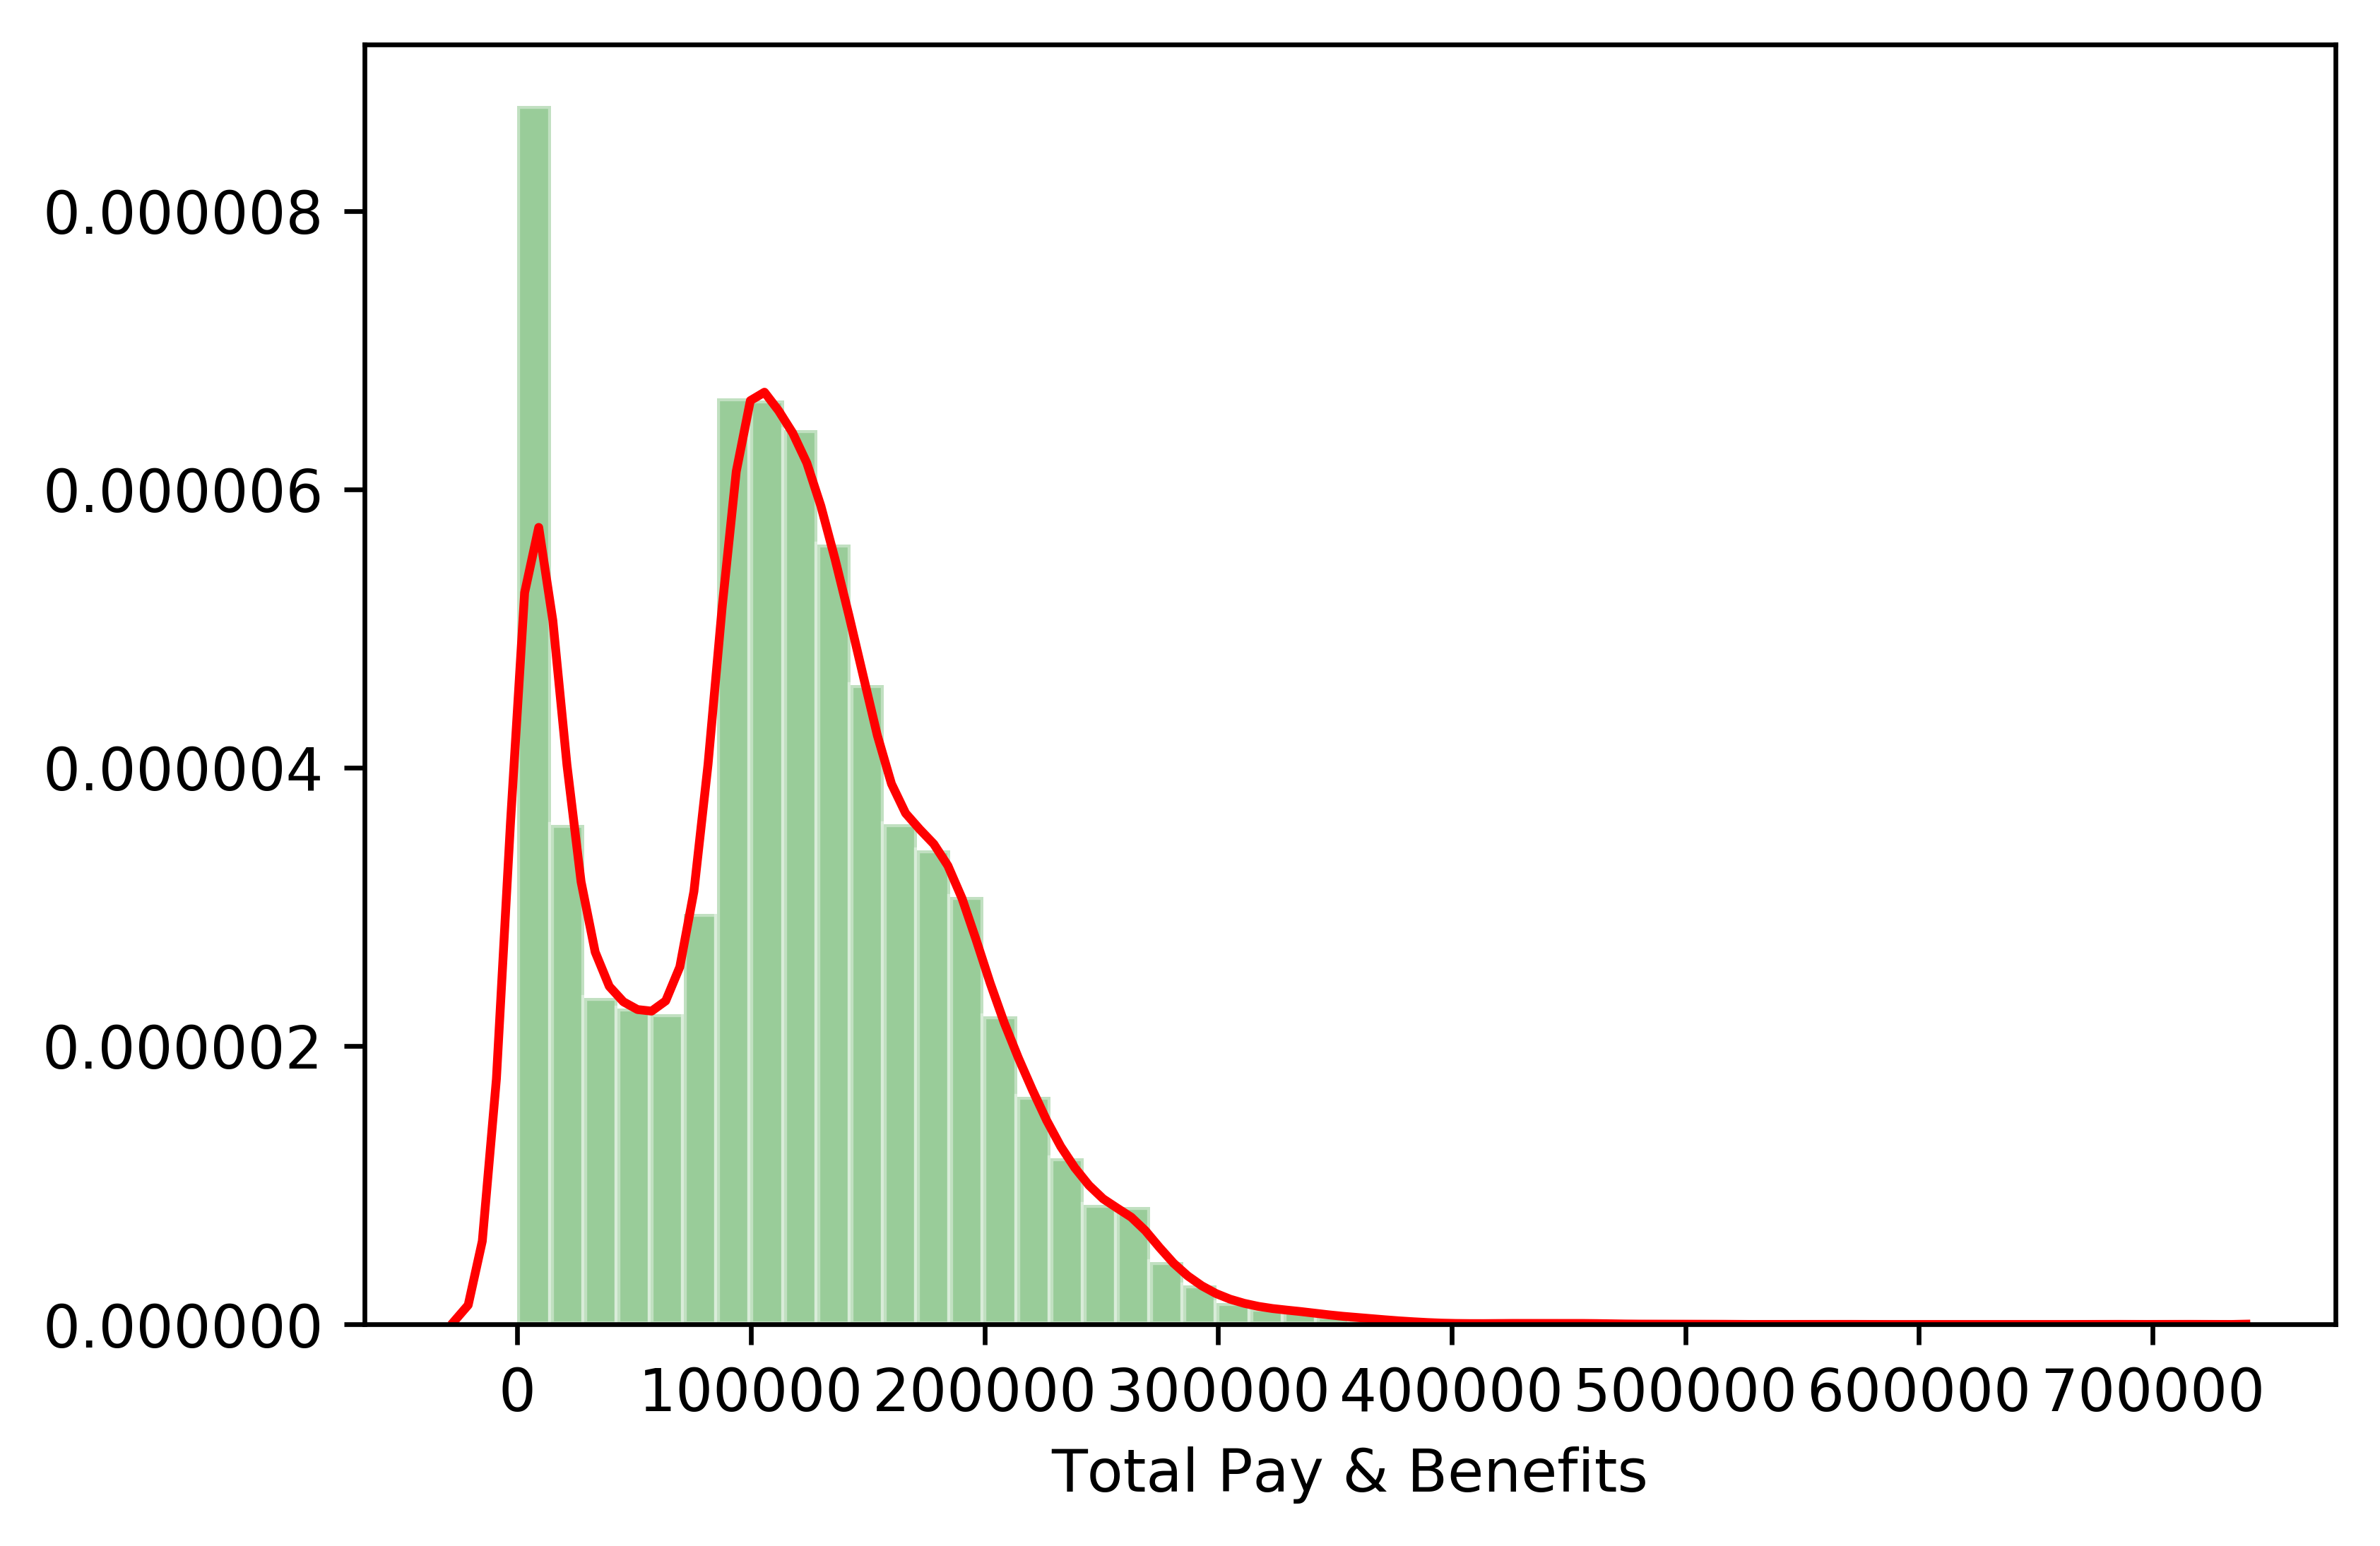

In [23]:
ax=plt.figure(dpi=600)
sns.distplot(salary['Total Pay & Benefits'], hist_kws=dict(color='green',ec='white', lw=1), bins=50,
                kde_kws=dict(color='red'))
#plt.xticks([0,600000,200000])
#plt.yticks([0.000001,0.000008,0.0000002])
#plt.set_xlabel('Total Pay & Benefits')

In [13]:
sum(salary['Status'].isnull())
#There is no NaN 

0

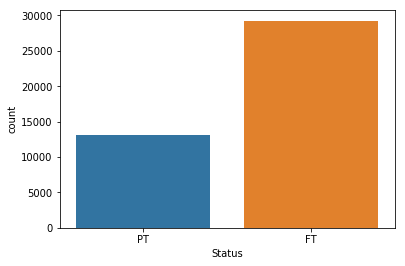

In [14]:
ax=plt.figure(dpi=600)
sns.countplot(x = salary['Status'], data = salary)
# The number of Part-time job is half of full-time jobs 

In [15]:
salary2=salary[['Base Pay','Overtime Pay','Other Pay','Benefits','Total Pay','Total Pay & Benefits']]

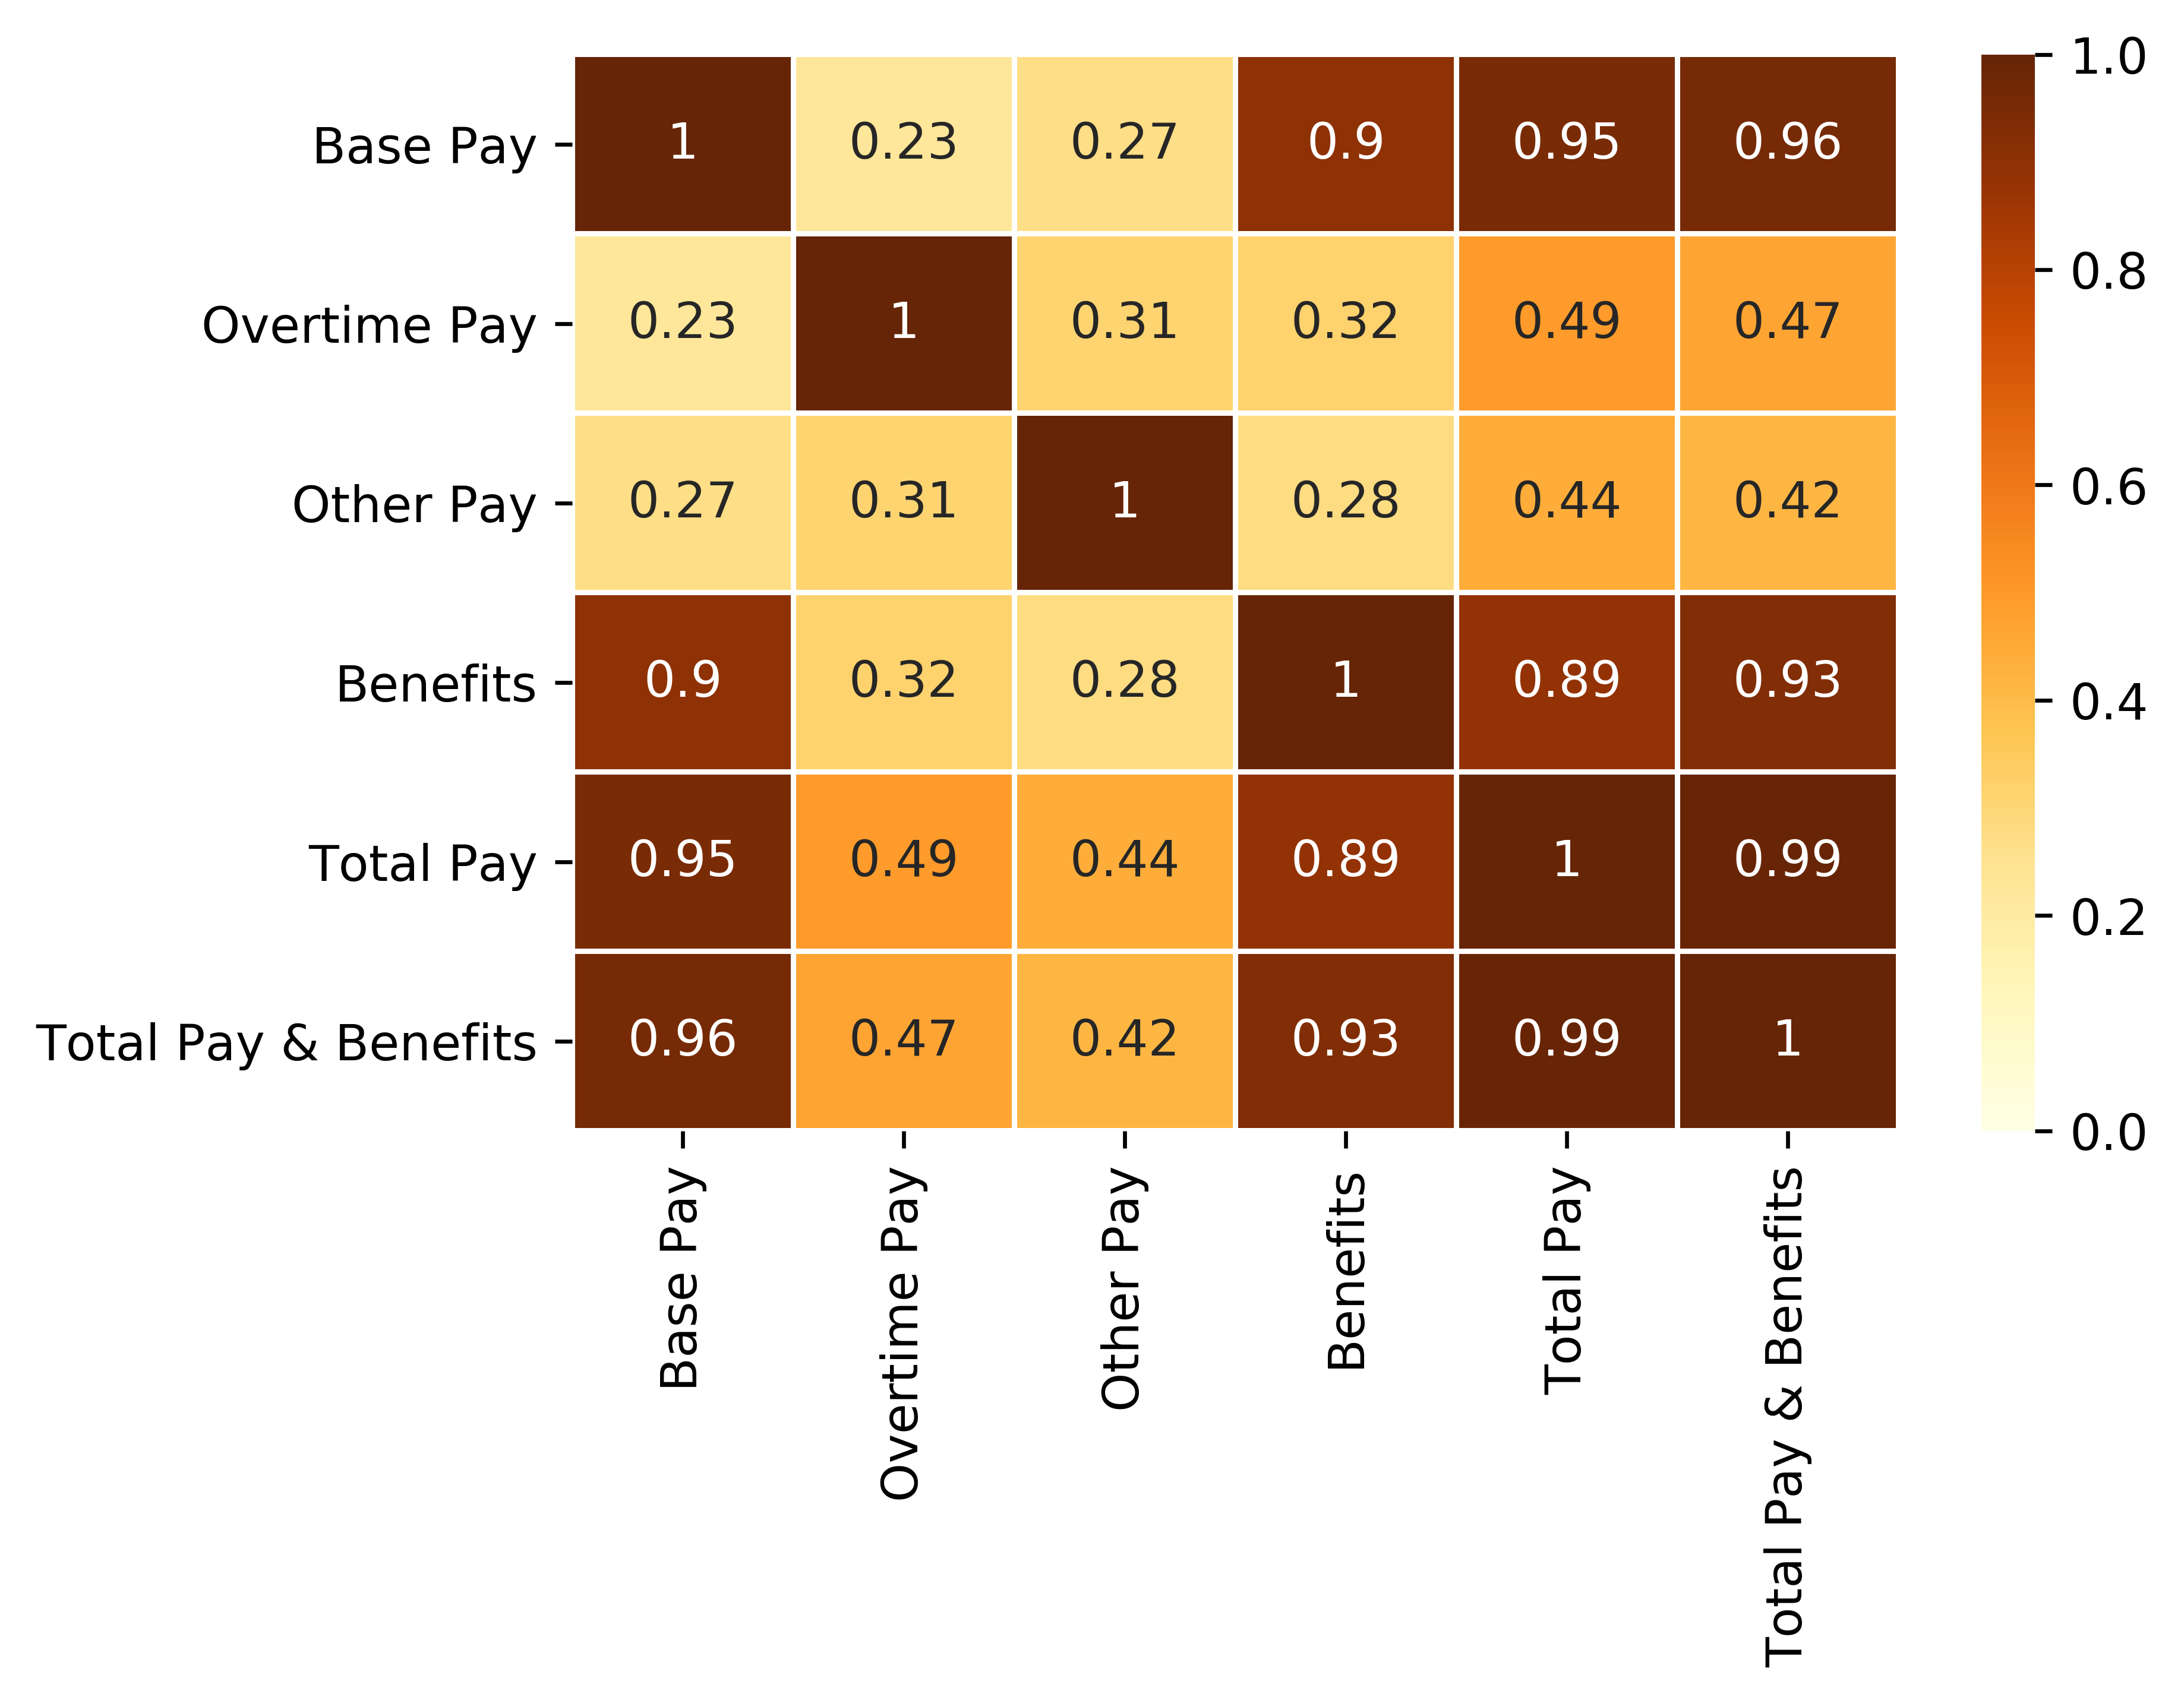

In [16]:
feri1=plt.figure(dpi=600)
sns.heatmap(salary2.corr(), cmap="YlOrBr", linewidths=1, annot=True, vmin=0,vmax=1)


In [17]:
salary['Status'].unique()

array(['PT', 'FT'], dtype=object)

In [18]:
76947.426822/2

38473.713411

In [19]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42309 entries, 0 to 42308
Data columns (total 12 columns):
Employee Name           42309 non-null object
Job Title               42309 non-null object
Base Pay                42309 non-null float64
Overtime Pay            42309 non-null float64
Other Pay               42309 non-null float64
Benefits                42309 non-null float64
Total Pay               42309 non-null float64
Total Pay & Benefits    42309 non-null float64
Year                    42309 non-null int64
Notes                   0 non-null float64
Agency                  42309 non-null object
Status                  42309 non-null object
dtypes: float64(7), int64(1), object(4)
memory usage: 3.9+ MB


In [20]:
salary.isnull().sum()

Employee Name               0
Job Title                   0
Base Pay                    0
Overtime Pay                0
Other Pay                   0
Benefits                    0
Total Pay                   0
Total Pay & Benefits        0
Year                        0
Notes                   42309
Agency                      0
Status                      0
dtype: int64

In [21]:
salary.head()

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,Paulo Morgado,Police Officer 3,592394.34,0.0,0.0,120408.02,592394.34,712802.36,2018,NaN,San Francisco,PT
1,William J Coaker Jr.,Chief Investment Officer,560793.00,0.0,0.0,119876.54,560793.00,680669.54,2018,NaN,San Francisco,FT
2,David E Francl,Managing Director,468997.01,0.0,0.0,94470.27,468997.01,563467.28,2018,NaN,San Francisco,FT
3,Arthur L Wang,Managing Director,415876.10,0.0,48784.5,82143.88,464660.60,546804.48,2018,NaN,San Francisco,FT
4,Cherisse Elaine Boland,Criminalist III,417600.54,0.0,0.0,91755.22,417600.54,509355.76,2018,NaN,San Francisco,FT


In [22]:
salary.drop(['Pension Debt','Notes'], axis=1, inplace=True)

KeyError: "['Pension Debt'] not found in axis"

In [ ]:
salary.head()